# 0/ Overview

This is the __second__ part of our [project](https://github.com/the0nlyWyvern/Top_tracks_in_Vietnam "github")
- Check the first part [here](https://colab.research.google.com/drive/1bOv9_al3FdaYQh4Luteu9x3iWguxkBIz "colab")

# 1/ Download the data from Github

In [ ]:
!wget https://raw.githubusercontent.com/the0nlyWyvern/Top_tracks_in_Vietnam/main/data/rawData/top_tracks_by_artist.csv

--2023-01-10 13:00:59--  https://raw.githubusercontent.com/the0nlyWyvern/Top_tracks_in_Vietnam/main/data/rawData/top_tracks_by_artist.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208174 (203K) [text/plain]
Saving to: ‘top_tracks_by_artist.csv.1’

top_tracks_by_artis 100%[===================>] 203.29K  --.-KB/s    in 0.02s   

2023-01-10 13:00:59 (8.01 MB/s) - ‘top_tracks_by_artist.csv.1’ saved [208174/208174]



# 2/ Libraries

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns

# 3/ Load data into dataframe

In [ ]:
tracks_df = pd.read_csv('top_tracks_by_artist.csv', encoding = 'utf-8')
tracks_df.head(10)

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,2QeCJM7ZmVS8xwjjaHahhv,Tân Cổ Cánh Hoa Yêu,Vọng Cổ Việt Nam,88,[],Tân Cổ Cánh Hoa Yêu,2021-05-11,1,461098,False,15
1,4qlh8lE1HAK9QhO6hYpu9A,Tân Cổ Ru Nửa Vầng Trăng,Vọng Cổ Việt Nam,88,[],Tân Cổ Ru Nửa Vầng Trăng,2021-01-11,1,517289,False,11
2,0W5IsXzhv7l690pNXLQFeM,Tân Cổ Sao Út Nỡ Vội Lấy Chồng,Vọng Cổ Việt Nam,88,[],Tân Cổ Sao Út Nỡ Vội Lấy Chồng,2021-01-11,1,529642,False,10
3,6JEJawcNecNh6W1fb4a6qE,Tân Cổ Con Đò Lỡ Hẹn,Vọng Cổ Việt Nam,88,[],Tân Cổ Con Đò Lỡ Hẹn,2021-10-11,1,557823,False,10
4,5k0wsqLadgNbxv5nNl0tlb,Tân Cổ Buồn Trong Kỷ Niệm,Vọng Cổ Việt Nam,88,[],Tân Cổ Buồn Trong Kỷ Niệm,2021-10-11,1,556309,False,9
5,0eRW4f7LcCabJp4fX0fQC9,Tân Cổ Chim Trắng Mồ Côi,Vọng Cổ Việt Nam,88,[],Tân Cổ Chim Trắng Mồ Côi,2021-10-11,1,538517,False,9
6,400fPjt1lvxA4FR0DFUFaG,Tân Cổ Quán Nửa Khuya,Vọng Cổ Việt Nam,88,[],Tân Cổ Quán Nửa Khuya,2021-01-11,1,509781,False,9
7,3MfHtLePUP5TXStdkM7MRT,Tân Cổ Đêm Mơ Em Hát Dân Ca,Vọng Cổ Việt Nam,88,[],Tân Cổ Đêm Mơ Em Hát Dân Ca,2021-10-11,1,526741,False,8
8,7Mz5K15plDojVhCoHmMovg,Tân Cổ Tiền Thắng Tình Thua,Vọng Cổ Việt Nam,88,[],Tân Cổ Tiền Thắng Tình Thua,2021-01-11,1,455061,False,8
9,1TPQApxiS5nzKdleTnU1L1,Trích Đoạn Máu Nhuộm Sân Chùa,Vọng Cổ Việt Nam,88,[],Trích Đoạn Máu Nhuộm Sân Chùa,2021-10-11,1,698282,False,7


# 4/ Số dòng, số cột

In [ ]:
num_rows, num_cols = tracks_df.shape
print('Number of rows: {}\nNumber of columns: {}'.format(num_rows, num_cols))

Số dòng: 1489
Số cột: 11


## 4.1/ Data type

In [ ]:
tracks_df.dtypes

id                    object
name                  object
artist                object
artist_followers       int64
artist_genres         object
album                 object
release_date          object
album_total_tracks     int64
duration               int64
explicit                bool
popularity             int64
dtype: object

## 4.2/ Meaning of columns

| Column | Meaning |
| --- | --- |
| **id** | ID of song |
| **name** | Song name |
| **artist** | Artist |
| **artist_followers** | Number of follwers of artist |
| **artist_genres** | Main genres of artist |
| **album** | The album contains the song |
| **release_date** | Release date |
| **album_total_tracks** | Number of songs of the album |
| **duration** | Duration (ms) |
| **explicit** | Whether the song is inappropriate for children |
| **popularity** | Popularity on scale from 0 to 100 |

# 5/ Check duplicated and missing value of each columns

## 5.1/ Number of duplicated songs

In [ ]:
rows_dup_count = tracks_df.duplicated(subset = ['id']).sum()
print('Number of duplicated rows: {}'.format(rows_dup_count))

Số dòng bị trùng: 91


There are 91 songs with the same id. This is because a song can be made by many different artists , resulting in the song appearing more than once in the data file. For example, remix & cover are also counted.

## 5.2/ Missing value

In [ ]:
def missing_ratio(s):
  '''
    input: the column of the dataframe or a series object
    output: the missing values ratio of the input column in percentage from 0 to 100
    calculating the missing values ratio of a column
  '''
  return s.isna().mean()*100

missing_ratio_df = tracks_df.agg(missing_ratio).round(3).to_frame(name = 'missing ratio')
missing_ratio_df.sort_values(by = 'missing ratio', ascending = False)

,missing ratio
id,0.0
name,0.0
artist,0.0
artist_followers,0.0
artist_genres,0.0
album,0.0
release_date,0.0
album_total_tracks,0.0
duration,0.0
explicit,0.0


There is no missing value.

# 6/ Change data type

## 6.1/ Handle __datetime__ type

A glance at the data, we see that there are 2 datatime types, __yyyy-mm-dd__ and only __year__ (e.g. 2015).

Solution:
- Step 1: handle the __yyyy-mm-dd__ form first, the error lines will be marked _NaT_ (Not a Time).
- Step 2: For the highlighted lines, process the __year__ form.

Syntax: `pd.to_datetime()` with arg `errors="coerce"`,
where `coerce` (coercion) means implicit conversion from one form to another. Just add in step 1, replace the default form as _"raise"_.

If there are __at least__ 2 types of data, there will be no error. Otherwise, it will give an error if there is another type, so we will still add `errors="coerce"` in the 3rd line.

In [ ]:
datatime_col = pd.to_datetime(tracks_df['release_date'], format='%Y-%m-%d', errors="coerce") \
                .fillna( \
                pd.to_datetime(tracks_df['release_date'], format='%Y', errors="coerce"))

Check which line fails using `isnat` (just like using `isna()`)

In [ ]:
datatime_col[np.isnat(datatime_col)]

511   NaT
Name: release_date, dtype: datetime64[ns]

Erorr in line 511<sup>th</sup>, let's view this line (pay attention at __release_date__)

In [ ]:
tracks_df.iloc[511]

id                    7BSyMiUKDSXdnZ9wTmLPKv
name                                  Năm Ấy
artist                              Đức Phúc
artist_followers                      854455
artist_genres                      ['v-pop']
album                                 Năm Ấy
release_date                            0000
album_total_tracks                         1
duration                              260351
explicit                               False
popularity                                47
Name: 511, dtype: object

We will see if there are other lines containing the song name and artist that match the error line. From there we can substitute the current value.

In [ ]:
tracks_df[(tracks_df['name']=='Năm Ấy') & (tracks_df['artist']=='Đức Phúc')]

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
511,7BSyMiUKDSXdnZ9wTmLPKv,Năm Ấy,Đức Phúc,854455,['v-pop'],Năm Ấy,0000,1,260351,False,47


Oops, no lines found. We can delete this line or I chose to _google_ this song and filled this line manually.

In [ ]:
datatime_col.loc[511] = pd.Timestamp(2017,12,22)

In [ ]:
tracks_df['release_date'] = datatime_col
tracks_df['release_date'].dtype

dtype('<M8[ns]')

## 6.2/ Handle __artist_genres__ type

Use method `literal_eval()` from __ast__ library (this is a builtin library, no need to install).
After changing, __dtype__ is still __object__

In [ ]:
tracks_df['artist_genres'] = tracks_df['artist_genres'].apply(literal_eval)

In [ ]:
tracks_df['artist_genres'].head(15)

0                                        []
1                                        []
2                                        []
3                                        []
4                                        []
5                                        []
6                                        []
7                                        []
8                                        []
9                                        []
10    [v-pop, vietnamese singer-songwriter]
11    [v-pop, vietnamese singer-songwriter]
12    [v-pop, vietnamese singer-songwriter]
13    [v-pop, vietnamese singer-songwriter]
14    [v-pop, vietnamese singer-songwriter]
Name: artist_genres, dtype: object

## 6.3/ Convert __milisecond__ to __second__

In [ ]:
tracks_df['duration'] = tracks_df['duration'].apply(lambda x : round(x/1000))
tracks_df.head(5)

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,2QeCJM7ZmVS8xwjjaHahhv,Tân Cổ Cánh Hoa Yêu,Vọng Cổ Việt Nam,88,[],Tân Cổ Cánh Hoa Yêu,2021-05-11,1,461,False,15
1,4qlh8lE1HAK9QhO6hYpu9A,Tân Cổ Ru Nửa Vầng Trăng,Vọng Cổ Việt Nam,88,[],Tân Cổ Ru Nửa Vầng Trăng,2021-01-11,1,517,False,11
2,0W5IsXzhv7l690pNXLQFeM,Tân Cổ Sao Út Nỡ Vội Lấy Chồng,Vọng Cổ Việt Nam,88,[],Tân Cổ Sao Út Nỡ Vội Lấy Chồng,2021-01-11,1,530,False,10
3,6JEJawcNecNh6W1fb4a6qE,Tân Cổ Con Đò Lỡ Hẹn,Vọng Cổ Việt Nam,88,[],Tân Cổ Con Đò Lỡ Hẹn,2021-10-11,1,558,False,10
4,5k0wsqLadgNbxv5nNl0tlb,Tân Cổ Buồn Trong Kỷ Niệm,Vọng Cổ Việt Nam,88,[],Tân Cổ Buồn Trong Kỷ Niệm,2021-10-11,1,556,False,9


# 7/ Top 10 Vietnamese artists have to highest number of followers on Spotify

Text(0.5, 1.0, 'Top 10 nghệ sĩ Việt Nam có số lượng followers trên Spotify cao nhất')

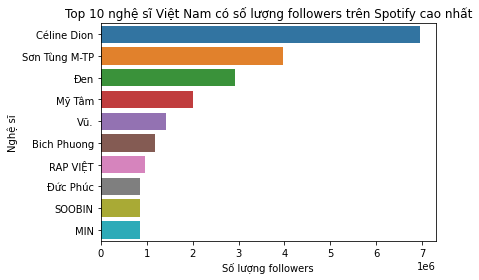

In [ ]:
sorted_df = tracks_df.sort_values(by = 'artist_followers', ascending = False)
sorted_df = sorted_df.drop_duplicates(subset = 'artist')[['artist', 'artist_followers']]
ax = sns.barplot(data = sorted_df.head(10), x = 'artist_followers', y = 'artist')
ax.set_xlabel('Number of followers')
ax.set_ylabel('Artist name')
ax.set_title('Top 10 Vietnamese artists have to highest number of followers on Spotify')

There is a small error here when __Céline Dion__ - the Canadian singer famous for the song My Heart Will Go On in the movie Titanic, is on the list of only _Vietnamese artists_.

We will proceed to filter the songs belonging to Céline Dion from the data set.

Text(0.5, 1.0, 'Top 10 nghệ sĩ Việt Nam có số lượng followers trên Spotify cao nhất')

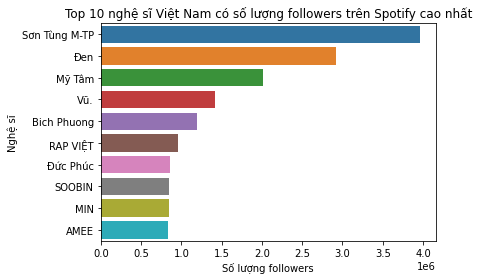

In [ ]:
tracks_df = tracks_df[tracks_df['artist'] != 'Céline Dion']
sorted_df = tracks_df.sort_values(by = 'artist_followers', ascending = False)
sorted_df = sorted_df.drop_duplicates(subset = 'artist')[['artist', 'artist_followers']]
ax = sns.barplot(data = sorted_df.head(10), x = 'artist_followers', y = 'artist')
ax.set_xlabel('Number of followers')
ax.set_ylabel('Artist name')
ax.set_title('Top 10 Vietnamese artists have to highest number of followers on Spotify')

# 8/ Songs with longest duration

In [ ]:
tracks_df.sort_values(by = 'duration', ascending = False).head(10)[['id', 'name', 'duration']].reset_index(drop = True)

,id,name,duration
0,24Xc0WonMsVrvp6UpDczkV,Bi Trường Kịch Lá Sầu Riêng,5171
1,1fIHuxhPOEMeJg4L668YkI,04 - Ngoai troi giong bao (Minh Canh-Minh Chi-...,754
2,1TPQApxiS5nzKdleTnU1L1,Trích Đoạn Máu Nhuộm Sân Chùa,698
3,6JEJawcNecNh6W1fb4a6qE,Tân Cổ Con Đò Lỡ Hẹn,558
4,5k0wsqLadgNbxv5nNl0tlb,Tân Cổ Buồn Trong Kỷ Niệm,556
5,2ePBZnZ9I824PlUdRYxWzA,Rapcoustic 5,547
6,2ePBZnZ9I824PlUdRYxWzA,Rapcoustic 5,547
7,0eRW4f7LcCabJp4fX0fQC9,Tân Cổ Chim Trắng Mồ Côi,539
8,1hUBB3bgU0p0FWmU2T7EUg,Sống Cho Hết Đời Thanh Xuân 2,533
9,0W5IsXzhv7l690pNXLQFeM,Tân Cổ Sao Út Nỡ Vội Lấy Chồng,530


The longest song is up to 5171 seconds, equivalent to about 86 minutes, many times larger than the second song at 754 seconds. We consider this is an outlier and proceed to remove the above song to facilitate visualization later.

In [ ]:
tracks_df = tracks_df[tracks_df['duration'] != 5171]

# 9/ Statistical table of numeric data columns

In [ ]:
tracks_df[['artist_followers','album_total_tracks','duration','popularity']].describe().drop(index = ['count', 'std']).round(2)

,artist_followers,album_total_tracks,duration,popularity
mean,237833.42,3.78,237.54,34.38
min,0.00,1.00,14.00,0.00
25%,5581.00,1.00,202.00,25.00
50%,59748.00,1.00,232.00,37.00
75%,248924.00,5.00,266.00,46.00
max,3958687.00,103.00,754.00,72.00


## 9.1/ Distribution chart of numeric data columns

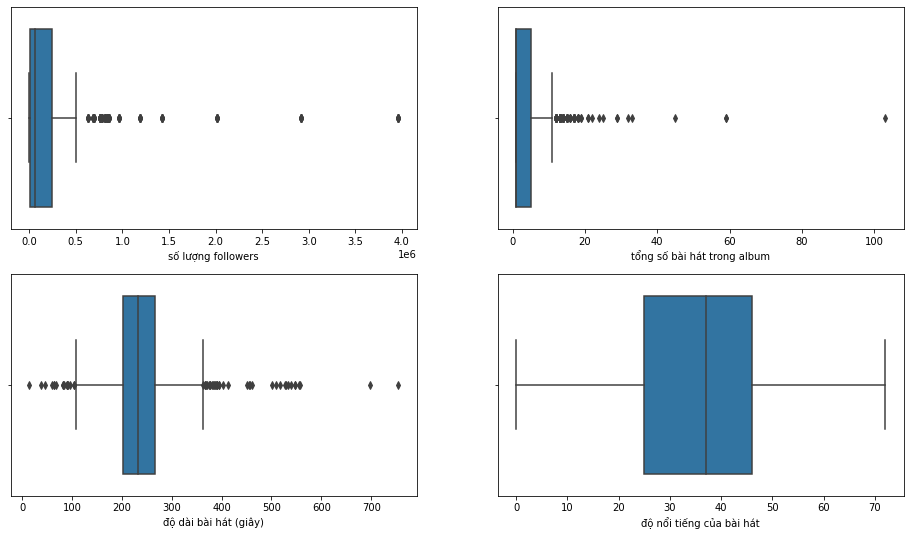

In [ ]:
numeric_df = tracks_df.select_dtypes(include = 'number')
subplot_label = {
  'artist_followers' : 'artist followers',
  'album_total_tracks' : 'total tracks in album',
  'duration' : 'duration (second)',
  'popularity' : 'popularity'
  }
fig,axes = plt.subplots(2,2,figsize = (16,9))
for ax, key in zip(axes.flat, list(subplot_label.keys())):
  sns.boxplot(data = numeric_df, x = key, ax = ax)
  ax.set_xlabel(subplot_label[key])

# 10/ Statistical table of categorical data columns

In [ ]:
tracks_df[['name','artist','artist_genres','album']].describe()

,name,artist,artist_genres,album
count,1478,1478,1478,1478
unique,1346,169,34,1126
top,có hẹn với thanh xuân,Vọng Cổ Việt Nam,[v-pop],Ca nguyện Tri ân (40 Năm Hồng Ân)
freq,4,10,424,10


# 11. Save to a file

- Save for later analysis for more convenient.
- Go to __Files__ section of Colab and right-click, select _refresh_ if you don't see the file, double click to view the file.

In [ ]:
tracks_df.to_csv('top_tracks_by_artist_cleaned.csv', index=False, encoding='utf-8')

## 11.1/ Download

Uncomment below cell

In [ ]:
# from google.colab import files
# files.download('top_tracks_by_artist_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>